# Predicción de primas de seguro:

El conjunto de datos contiene algunos atributos para cada persona, como: edad, sexo, índice de masa corporal, niños, fumador, región y sus cargos

## Objetivo:

usar esta información para predecir cargos para nuevos clientes

In [36]:
import pandas as pd
insurance = pd.read_csv('insurance.csv')

In [37]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
# muestra información del dataframe insurance
# Completa
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
# Describe estadísticamente el df insurance
# Completa
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
# obten los valores nulos
insurance.isnull().values

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [6]:
print("Renglones            :", insurance.shape[0])
print("Columnas             :", insurance.shape[1])
print("\nCaracterísticas    :", insurance.columns.tolist())
print("\nValores perdidos   :", insurance.isnull().sum().sum())
print("\nValores únicos     :\n", insurance.nunique())

Renglones            : 1338
Columnas             : 7

Características    : ['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

Valores perdidos   : 0

Valores únicos     :
 age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64


In [16]:
# Cambiar columna sex y smoker a numérica con 0 y 1
#insurance['sex'] = insurance['sex'].replace({'male': 1, 'female': 0})
#insurance['smoker'] = insurance['smoker'].replace({'yes': 1, 'no': 0})

In [38]:
numeric_insurance = insurance.select_dtypes(include=['int64', 'float64'])

In [18]:
#quitar column de region
#insurance = insurance.drop(columns='region')

In [39]:
#Obten la correlación del df insurance
numeric_insurance.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<Axes: >

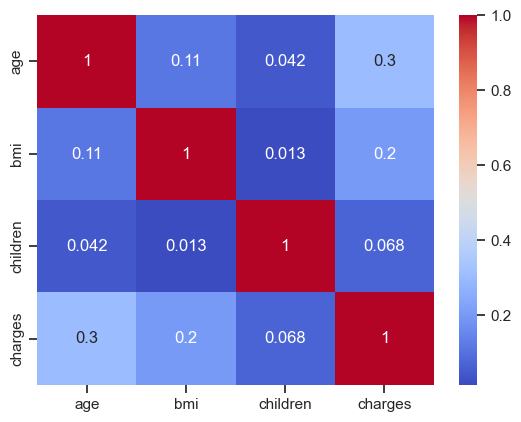

In [41]:
# Obten la gráfica de la matriz de correlación

import seaborn as sns

# Calcular la matriz de correlacion
corr = numeric_insurance.corr()

# Grafica de la matriz de correlacion
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [42]:
insurance.columns.to_list()

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<Axes: ylabel='Frequency'>

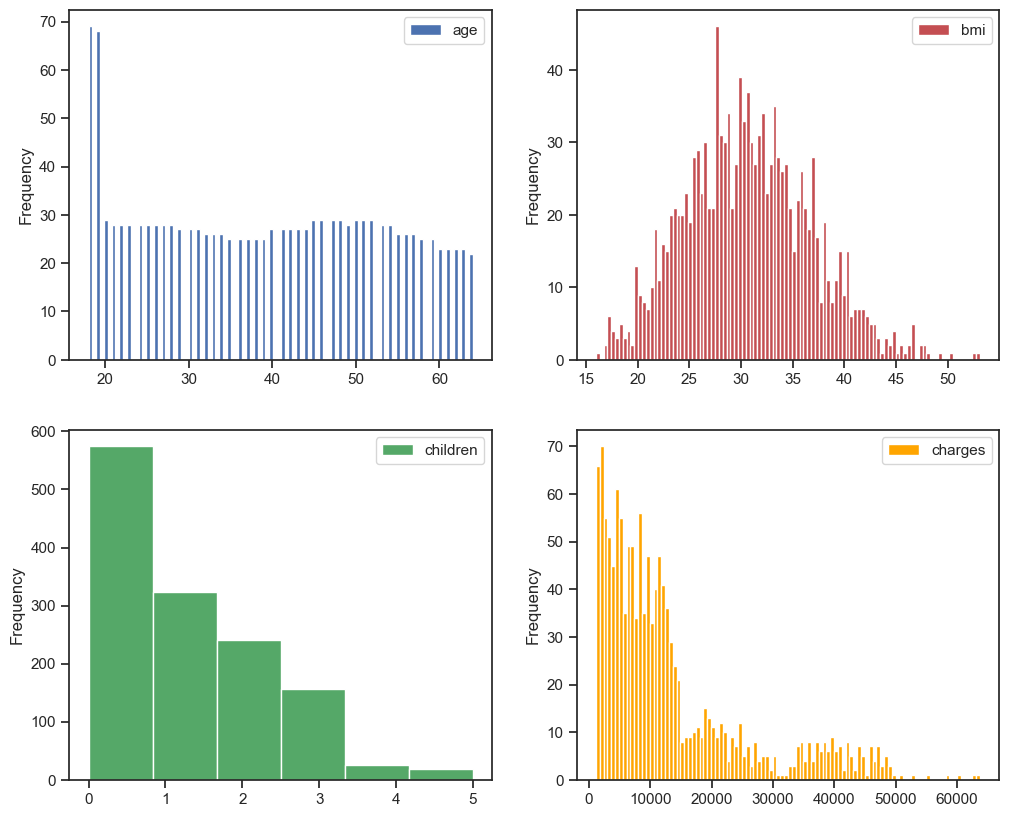

In [43]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,10))
insurance.plot(kind="hist", y="age", bins=100, color="b",
               ax=axes[0][0])
insurance.plot(kind="hist", y="bmi", bins=100, color="r",
               ax=axes[0][1])
insurance.plot(kind="hist", y="children", bins=6, color="g",
               ax=axes[1][0])
insurance.plot(kind="hist", y="charges", bins=100, color="orange",
               ax=axes[1][1])

<Axes: xlabel='sex'>

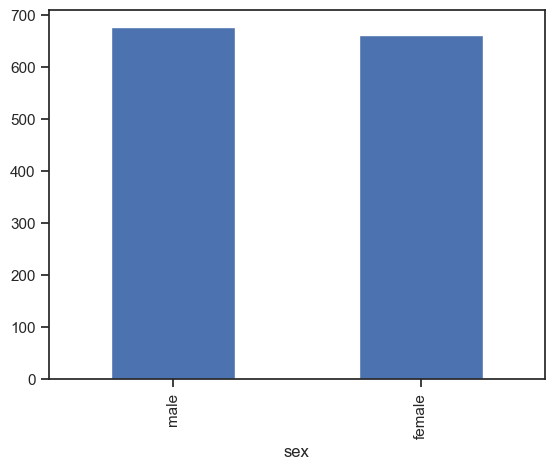

In [44]:
insurance['sex'].value_counts().plot(kind = "bar")

<Axes: xlabel='smoker'>

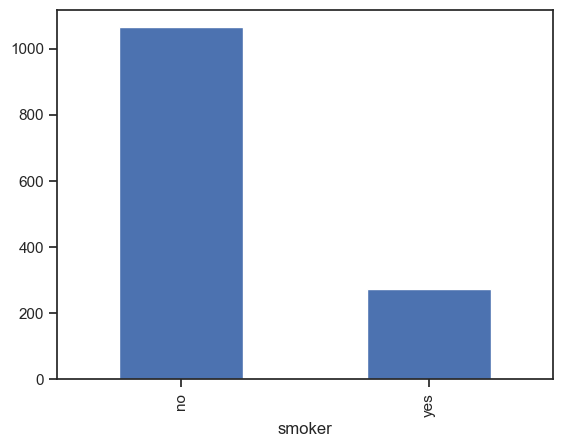

In [45]:
insurance['smoker'].value_counts().plot(kind = "bar")

<Axes: title={'center': 'Children vs. Charges'}, xlabel='children', ylabel='charges'>

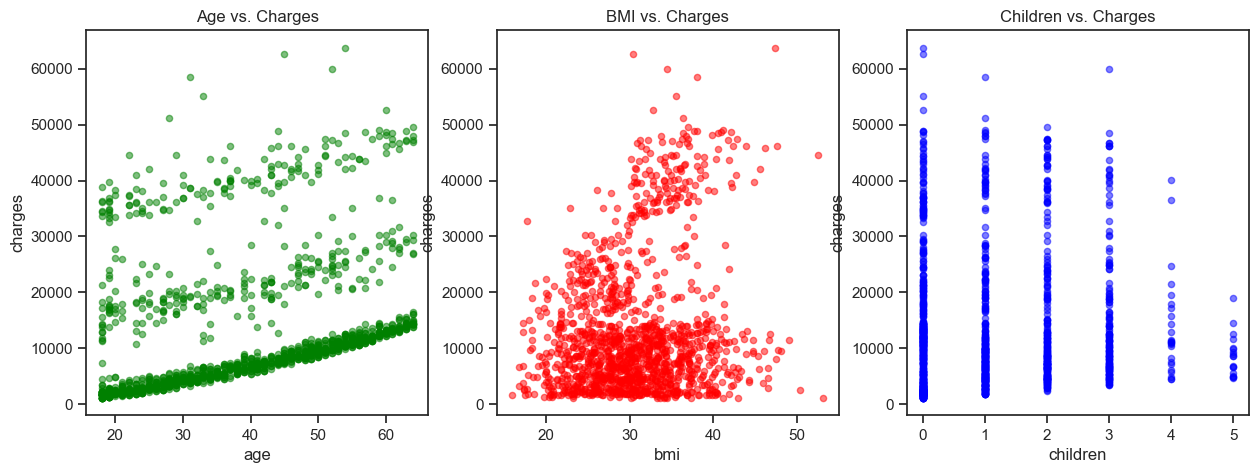

In [46]:
from matplotlib.pyplot import title


fig,axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))
insurance.plot(kind = 'scatter', x='age', y='charges',
               alpha=0.5, color='green',ax=axes[0],
               title="Age vs. Charges")
insurance.plot(kind = 'scatter', x='bmi', y='charges',
               alpha=0.5, color='red',ax=axes[1],
               title="BMI vs. Charges")
insurance.plot(kind = 'scatter', x='children', y='charges',
               alpha=0.5, color='blue',ax=axes[2],
               title="Children vs. Charges")

<Axes: xlabel='bmi', ylabel='charges'>

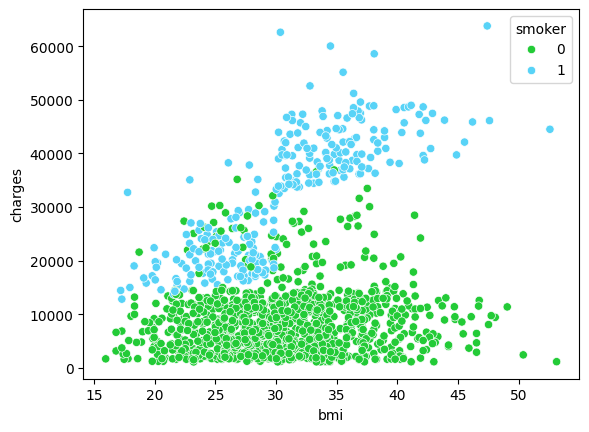

In [28]:

pal = ["#23CB37","#58D3F7"]
sns.scatterplot (x="bmi", y="charges", data = insurance,
                 palette=pal, hue="smoker")

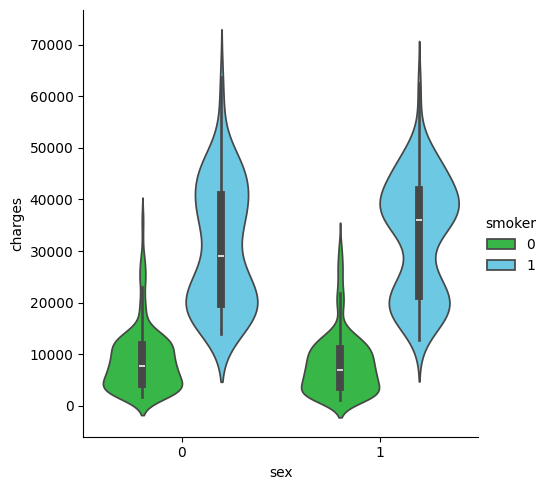

In [29]:
sns.catplot(x="sex", y="charges", hue="smoker", kind ='violin',
            data=insurance, palette=pal)

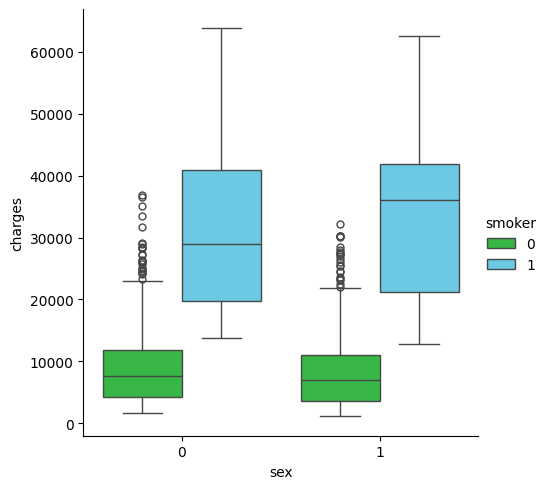

In [30]:
sns.catplot(x="sex", y="charges", hue="smoker", kind ='box',
            data=insurance, palette=pal)

Text(0.5, 1.0, 'Smokers')

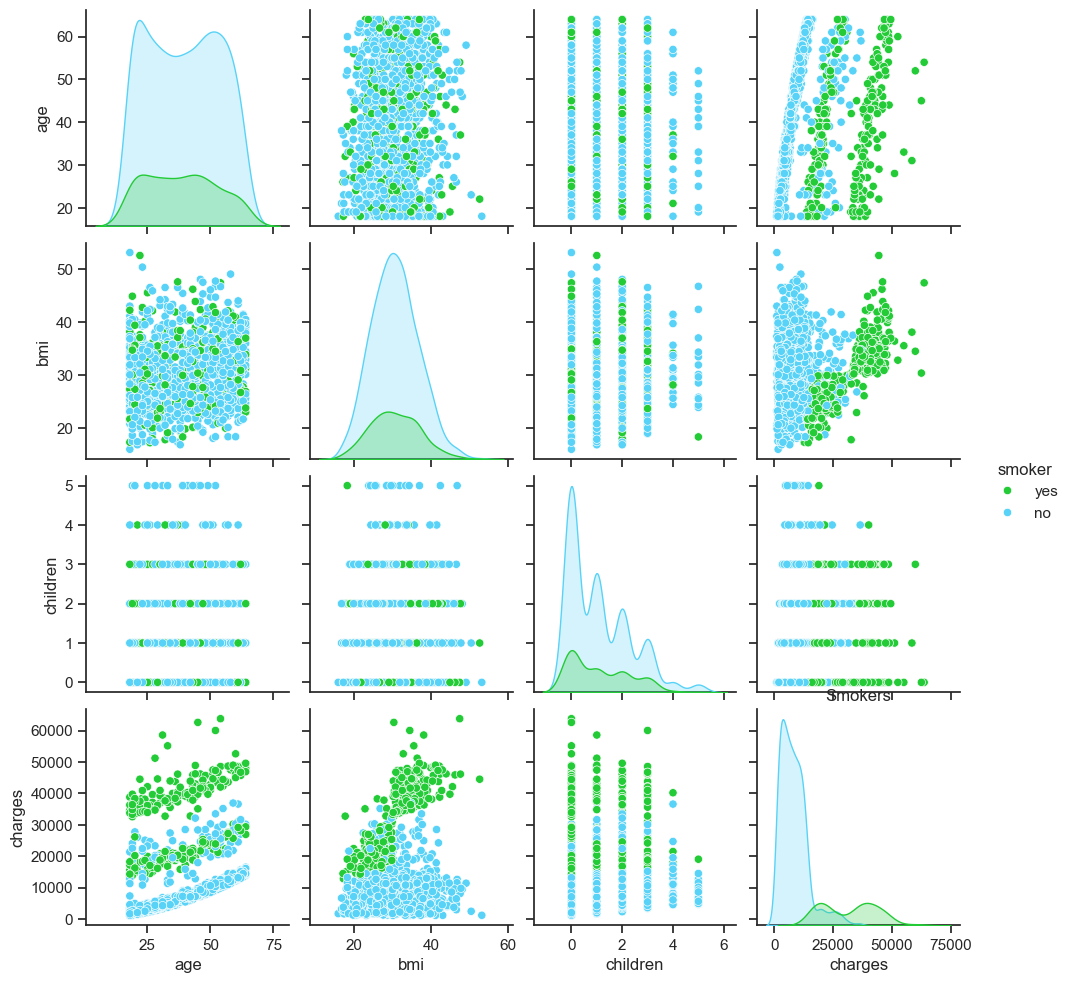

In [47]:

# Gráfica pairplot

sns.set(style="ticks")
sns.pairplot(insurance, hue="smoker", palette=pal)
plt.title("Smokers")

# Preparación de los datos para algoritmos ML

In [49]:
# Muestra los primeros renglones del df insurance

insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [48]:
insurance['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [50]:
insurance.drop(["region"], axis=1, inplace=True)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,female,27.900,0,yes,16884.92400
1,18,male,33.770,1,no,1725.55230
2,28,male,33.000,3,no,4449.46200
3,33,male,22.705,0,no,21984.47061
4,32,male,28.880,0,no,3866.85520


In [51]:
# transforma los atributos 'sex' y 'smoker' a variable indicadora

insurance['sex'] = insurance['sex'].map(lambda s :1
                                        if s== 'female' else 0)
insurance['smoker'] = insurance['smoker'].map(lambda s :1
                                       if s== 'yes' else 0)
insurance.head()

,age,sex,bmi,children,smoker,charges
0,19,1,27.900,0,1,16884.92400
1,18,0,33.770,1,0,1725.55230
2,28,0,33.000,3,0,4449.46200
3,33,0,22.705,0,0,21984.47061
4,32,0,28.880,0,0,3866.85520


In [54]:
# obten el conjunto de atributos X
X = insurance.drop('charges', axis=1)

In [55]:
X

,age,sex,bmi,children,smoker
0,19,1,27.900,0,1
1,18,0,33.770,1,0
2,28,0,33.000,3,0
3,33,0,22.705,0,0
4,32,0,28.880,0,0
...,...,...,...,...,...
1333,50,0,30.970,3,0
1334,18,1,31.920,0,0
1335,18,1,36.850,0,0
1336,21,1,25.800,0,0


In [56]:
# Obten el conjunto de valores de la variale dependiente y
y = insurance['charges']

In [57]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

# Modelando los datos

In [58]:
# importa librerias necesarias para regresión línueal múltiple
from random import random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Obtener el conjunto de datos
X_train, X_test, y_train, y_test = train_test_split (X,y, random_state=0)

# Normalizar los datos

sc = StandardScaler()
X_train = sc.fit_transform(X_train)

X_test = sc.transform(X_test)

# Ajusta el modelo para el conjunto de datos de entrenamiento
# Completa
multiple_linear_reg = LinearRegression()
multiple_linear_reg.fit(X_train, y_train)

# Obten los valores de predicción para los conjuntos de datos de entrenamiento y de prueba
# Completa

# Predicción con el dataset de entrenamiento:
y_pred_MLR_train = multiple_linear_reg.predict(X_train)

# Predicción con el dataset de prueba
y_pred_MLR_test = multiple_linear_reg.predict(X_test)


### Evaluando el modelo de regresión líneal múltiple

In [59]:
# Importar librerias necesario

# Encontar R2 de entrenamiento para este modelo:

print("R2 de entrenamiento para el modelo de regresión lineal múltiple: ", )

# Encontrar R2 de prueba para este modelo:

print("R2 de prueba para el modelo de regresión lineal múltiple: " )

# Encontrar RMSE para los datos de entrenamiento

print("RMSE para los datos de entrenamiento: ", )

#Encontrar RMSE para los datos de prueba:

print("RMSE para los datos de prueba ", )




R2 de entrenamiento para el modelo de regresión lineal múltiple: 
R2 de prueba para el modelo de regresión lineal múltiple: 
RMSE para los datos de entrenamiento: 
RMSE para los datos de prueba 


In [60]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Calculate R2 score for training data
r2_train = r2_score(y_train, y_pred_MLR_train)
print("R2 de entrenamiento para el modelo de regresión lineal múltiple: ", r2_train)

# Calculate R2 score for test data
r2_test = r2_score(y_test, y_pred_MLR_test)
print("R2 de prueba para el modelo de regresión lineal múltiple: ", r2_test)

# Calculate RMSE for training data
rmse_train = np.sqrt(mean_squared_error(y_train, y_pred_MLR_train))
print("RMSE para los datos de entrenamiento: ", rmse_train)

# Calculate RMSE for test data
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_MLR_test))
print("RMSE para los datos de prueba ", rmse_test)

R2 de entrenamiento para el modelo de regresión lineal múltiple:  0.732745261917263
R2 de prueba para el modelo de regresión lineal múltiple:  0.7952171980481992
RMSE para los datos de entrenamiento:  6179.712472723771
RMSE para los datos de prueba  5678.017317091147


## Regresión Polinómica

In [61]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Create an instance with polynomial features of degree 3
polynomial_features = PolynomialFeatures(degree=3)

# Fit and transform the training data to polynomial
x_train_poly = polynomial_features.fit_transform(X_train)

# Fit and transform the test data to polynomial
x_test_poly = polynomial_features.transform(X_test)

# Create an instance for the linear regression model
polynomial_reg = LinearRegression()

# Fit the data to the model
polynomial_reg.fit(x_train_poly, y_train)

LinearRegression()

### Evaluación del modelo de regresión polinomial

In [62]:
# Prediction with the training dataset:
y_pred_PR_train = polynomial_reg.predict(x_train_poly)

# Prediction with the test dataset
y_pred_PR_test = polynomial_reg.predict(x_test_poly)

# Calculate R2 score for training data
accuracy_PR_train = r2_score(y_train, y_pred_PR_train)
print("R2 de entrenamiento para el modelo de regresión polinomial: ", accuracy_PR_train)

# Calculate R2 score for test data
accuracy_PR_test = r2_score(y_test, y_pred_PR_test)
print("R2 de prueba para el modelo de regresión polinomial: ", accuracy_PR_test)

# Calculate RMSE for training data
RMSE_PR_train = np.sqrt(mean_squared_error(y_train, y_pred_PR_train))
print("RMSE para los datos de entrenamiento: ", RMSE_PR_train)

# Calculate RMSE for test data
RMSE_PR_test = np.sqrt(mean_squared_error(y_test, y_pred_PR_test))
print("RMSE para los datos de prueba ", RMSE_PR_test)

R2 de entrenamiento para el modelo de regresión polinomial:  0.8355067409756198
R2 de prueba para el modelo de regresión polinomial:  0.8810305864622706
RMSE para los datos de entrenamiento:  4848.1898134761905
RMSE para los datos de prueba  4327.80448464373


### Evaluación del modelo de regresión de árbol de desición

In [64]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the DecisionTreeRegressor
decision_tree_reg = DecisionTreeRegressor(random_state=0)

# Fit the model to the training data
decision_tree_reg.fit(X_train, y_train)

# Prediction with the training dataset:
y_pred_DTR_train = decision_tree_reg.predict(X_train)

# Prediction with the test dataset
y_pred_DTR_test = decision_tree_reg.predict(X_test)

# Calculate R2 score for training data
accuracy_DTR_train = r2_score(y_train, y_pred_DTR_train)
print("R2 de entrenamiento para el modelo de regresión de árbol de decisión: ", accuracy_DTR_train)

# Calculate R2 score for test data
accuracy_DTR_test = r2_score(y_test, y_pred_DTR_test)
print("R2 de prueba para el modelo de regresión de árbol de decisión: ", accuracy_DTR_test)

# Calculate RMSE for training data
RMSE_DTR_train = np.sqrt(mean_squared_error(y_train, y_pred_DTR_train))
print("RMSE para los datos de entrenamiento: ", RMSE_DTR_train)

# Calculate RMSE for test data
RMSE_DTR_test = np.sqrt(mean_squared_error(y_test, y_pred_DTR_test))
print("RMSE para los datos de prueba ", RMSE_DTR_test)


R2 de entrenamiento para el modelo de regresión de árbol de decisión:  0.9994547916438284
R2 de prueba para el modelo de regresión de árbol de decisión:  0.72150032203511
RMSE para los datos de entrenamiento:  279.1173376029252
RMSE para los datos de prueba  6621.590527415354


### Resultados

1. **Regresión Lineal Múltiple**: Este modelo asume una relación lineal entre las variables independientes y la variable dependiente. El valor de R2 y el RMSE que se obtiene para este modelo indican qué tan bien el modelo se ajusta a los datos. Un valor de R2 más alto y un RMSE más bajo generalmente indican un mejor ajuste.

2. **Regresión Polinomial**: Este modelo es una forma de análisis de regresión en la que la relación entre la variable independiente x y la variable dependiente y se modela como un polinomio de grado n. La regresión polinomial puede modelar relaciones entre variables que no son lineales. Nuevamente, los valores de R2 y RMSE indican el rendimiento del modelo.

3. **Regresión de Árbol de Decisión**: Este modelo utiliza un árbol de decisión para pasar de observaciones sobre un elemento a conclusiones sobre el valor objetivo del elemento. Es un tipo de modelo que es particularmente bueno para manejar variables categóricas y relaciones complejas entre parámetros.

Explica cuál es el mejor modelo

Considero que el mejor modelo para este caso es el modelo de regresion de arbol de decision, ya obtenemos un valor R2 mas alto y un RMSE mas bajo comparado con los otros models desarrollados, lo que indica que el modelo se ajusta mejor a los datos.

### Probanado el mejor regreso con nuevos datos

In [65]:
input_data = {'age': [35],
              'sex': ['male'],
              'bmi': [26],
              'children': [0],
              'smoker': ['no'],
              'region': ['southeast']}

input_data = pd.DataFrame(input_data)
input_data

,age,sex,bmi,children,smoker,region
0,35,male,26,0,no,southeast


In [66]:
 # Pre-procesamiento del dato único
input_data.drop(["region"], axis=1, inplace=True)
input_data['sex'] = input_data['sex'].map(lambda s :1
                                          if s == 'female' else 0)
input_data['smoker'] = input_data['smoker'].map(lambda s :1
                                          if s == 'yes' else 0)
input_data

,age,sex,bmi,children,smoker
0,35,0,26,0,0


In [67]:
# Escalar los datos de entrada
input_data = sc.transform(input_data)
input_data

array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [68]:
# Reshape los datos de entrada en el formato requerido por el modelo de sklearn
input_data = input_data.reshape(1, -1)
print(input_data.shape)
input_data

(1, 5)


array([[-0.30137763, -1.01506865, -0.75753763, -0.89214407, -0.50373604]])

In [69]:
# Obtener la predicción para la tasa del seguro para el cliente nuevo

x_test_poly = polynomial_features.fit_transform(input_data)
polynomial_reg.predict(x_test_poly)

array([5582.0625])